In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
adults=pd.read_csv('data/adults.txt')
adults.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
X=adults[['age','education','occupation','hours_per_week']].copy()
Y=adults['salary'].copy()

In [ ]:
X.education.unique()

In [ ]:
np.argwhere(X.education.unique()=='Masters')

In [10]:
def edu2num(edu):

    return np.argwhere(X['education'].unique()==edu)[0,0]

def ocp2num(ocp):

    return np.argwhere(X['occupation'].unique()==ocp)[0,0]

In [11]:
edu_dummies=pd.get_dummies(X.education,prefix=['edu'])

In [15]:
len(X)

32561

In [18]:
X_edu_dummies=pd.concat([X,edu_dummies],axis=1)
len(X_edu_dummies)

32561

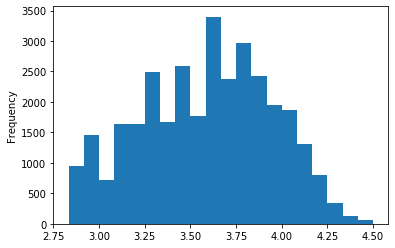

In [4]:
X.age.map(lambda x:np.log(x)).plot(kind='hist',bins=20)

In [5]:
X.head()

,age,education,occupation,hours_per_week
0,39,Bachelors,Adm-clerical,40
1,50,Bachelors,Exec-managerial,13
2,38,HS-grad,Handlers-cleaners,40
3,53,11th,Handlers-cleaners,40
4,28,Bachelors,Prof-specialty,40


In [7]:
X.age.apply(lambda x:np.log(x))
X.head()

,age,education,occupation,hours_per_week
0,39,Bachelors,Adm-clerical,40
1,50,Bachelors,Exec-managerial,13
2,38,HS-grad,Handlers-cleaners,40
3,53,11th,Handlers-cleaners,40
4,28,Bachelors,Prof-specialty,40


In [8]:
X.age.mean()

38.58164675532078

In [9]:
X.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64